## SHARK ATTACK PROJECT

In [1]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install xlrd

import pandas as pd
url = ("https://www.sharkattackfile.net/spreadsheets/GSAF5.xls")
sharkattacks_data = pd.read_excel(url)
display(sharkattacks_data.head().tail())

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Standardise column title names by turning them into lowercase and replacing blank spaces with underscores

sharkattacks_data.columns = sharkattacks_data.columns.str.strip().str.lower().str.replace(" ", "_")


In [4]:
#Decided on which columns are not relevant to our study and created a new data set with the dri

columns_to_drop = ["date", "time", "name", "source", "pdf", "href formula", "href", "case number", "case number.1", "unoriginal order", "unnamed: 21", "unnamed: 22"]

sharkattacks_data = sharkattacks_data.drop(sharkattacks_data.columns[[0, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22]], axis=1)



In [5]:
#standardising categorical data by turning every country into lowercase

sharkattacks_data["country"] = sharkattacks_data["country"].str.strip()
sharkattacks_data["country"] = sharkattacks_data["country"].str.title()



In [6]:
# Accessing top 15 countries with shark attacks

top15_countries = sharkattacks_data['country'].value_counts().head(15).index

sharkattacks_data = sharkattacks_data[sharkattacks_data['country'].isin(top15_countries)]


In [7]:
#Count the number of attacks by country 

country_counts = sharkattacks_data["country"].value_counts()
country_counts


country
Usa                 2579
Australia           1523
South Africa         599
New Zealand          146
Bahamas              141
Papua New Guinea     136
Brazil               123
Mexico               107
Italy                 72
Fiji                  70
New Caledonia         67
Philippines           65
Reunion               60
Egypt                 53
Mozambique            50
Name: count, dtype: int64

In [8]:
state_counts = sharkattacks_data["state"].value_counts()
state_counts

state
Florida                                                1192
New South Wales                                         522
Queensland                                              353
Hawaii                                                  345
California                                              327
                                                       ... 
KwaZulu-Natal between Port Edward and Port St Johns       1
Cikobia Island (north of Vanua Levu)                      1
Alaska                                                    1
L' Etang Salé-les-Bains                                   1
Moala Island                                              1
Name: count, Length: 378, dtype: int64

In [9]:
#Check the number of null values by column 

display(sharkattacks_data.isna().sum())

#Check percentage of null values in each column 

display((sharkattacks_data.isna().sum()/sharkattacks_data.shape[0]) * 100)



year            1
type           12
country         0
state         161
location      240
activity      423
name          123
sex           438
age          2217
injury         22
fatal_y/n     445
species      2400
dtype: int64

year          0.017268
type          0.207218
country       0.000000
state         2.780176
location      4.144362
activity      7.304438
name          2.123985
sex           7.563461
age          38.283543
injury        0.379900
fatal_y/n     7.684338
species      41.443619
dtype: float64

In [10]:
#check for total number of duplicates

print(sharkattacks_data.duplicated().sum())

#remove exact duplicates

sharkattacks_data = sharkattacks_data.drop_duplicates()

print(sharkattacks_data.duplicated().sum())

1
0


In [11]:
sharkattacks_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5790 entries, 0 to 7071
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       5789 non-null   float64
 1   type       5778 non-null   object 
 2   country    5790 non-null   object 
 3   state      5629 non-null   object 
 4   location   5550 non-null   object 
 5   activity   5367 non-null   object 
 6   name       5667 non-null   object 
 7   sex        5352 non-null   object 
 8   age        3574 non-null   object 
 9   injury     5768 non-null   object 
 10  fatal_y/n  5345 non-null   object 
 11  species    3390 non-null   object 
dtypes: float64(1), object(11)
memory usage: 588.0+ KB


In [40]:
#fixing data type 

sharkattacks_data["year"] = sharkattacks_data["year"].astype("Int64")
sharkattacks_data["age"] = pd.to_numeric(sharkattacks_data["age"], errors="coerce")

In [12]:
sharkattacks_data.isna().sum()

year            1
type           12
country         0
state         161
location      240
activity      423
name          123
sex           438
age          2216
injury         22
fatal_y/n     445
species      2400
dtype: int64

##Control for year (look at time trends) --> recorded incidents likely increased over time partly because of better documentation##

In [22]:
#WE WANT  TO SEE THE FIRST YEAR WE HAVE ON RECORD WITH A SHARK ATTACK THAT IS OVER THE YEAR 1900, AS THE DATASET CONTAINS SOME ERRONEOUS VALUES IN THE YEAR COLUMN

first_year = sharkattacks_data[sharkattacks_data["year"] > 1900]["year"].min()
print(f"The first year we have on record with a shark attack is: {first_year}")
# AND HOW MANY ATTACKS WERE THERE IN THAT YEAR?
attacks_in_first_year = sharkattacks_data[sharkattacks_data["year"] == first_year].shape[0]
print(f"The number of attacks in the year {first_year} was: {attacks_in_first_year}")
#WE STARTED WITH 1900 BECAUSE  THE INFORMATION BEFORE 1900 IS NOT AS RELEVANT TO OUR STUDY AS IT MAY NOT BE AS ACCURATE OR COMPLETE AS THE DATA AFTER 1900.

The first year we have on record with a shark attack is: 1901.0
The number of attacks in the year 1901.0 was: 7


In [24]:
#WE WANT TO SEE HOW THE NUMBER OF SHARK ATTACKS EVOLVED AFTER 1900, COUNTING THE NUMBER OF ATTACKS PER DECADE
attacks_per_decade = sharkattacks_data[sharkattacks_data["year"] > 1900].groupby(sharkattacks_data["year"] // 10 * 10).size()
print("Number of shark attacks per decade after 1900:")
print(attacks_per_decade)

Number of shark attacks per decade after 1900:
year
1900.0     105
1910.0     122
1920.0     167
1930.0     218
1940.0     178
1950.0     345
1960.0     502
1970.0     281
1980.0     402
1990.0     517
2000.0     923
2010.0    1100
2020.0     475
dtype: int64


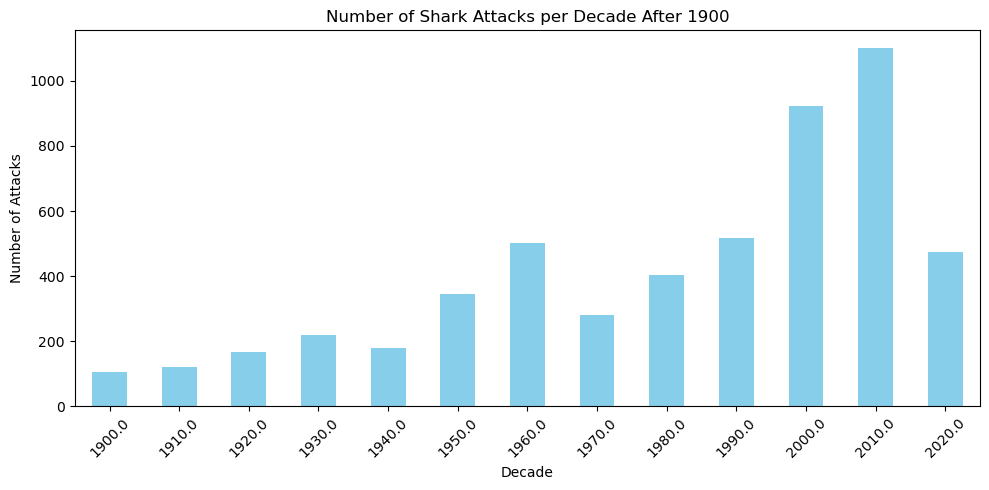

In [25]:
#NOW LET'S SEE THE NUMBER OF ATTACKS PER DECADE AFTER 1900 GRAPHICALLY
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
attacks_per_decade.plot(kind='bar', color='skyblue')
plt.title('Number of Shark Attacks per Decade After 1900')
plt.xlabel('Decade')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#THE TENDENCE OF THIS GRAPHIC SEEMS TO BE INCREASING, BUT WE HAVE TO TAKE INTO ACCOUNT THAT THE NUMBER OF ATTACKS MAY BE INFLUENCED BY THE INCREASE IN THE NUMBER OF PEOPLE LIVING NEAR THE COAST AND 
#THE INCREASE IN THE NUMBER OF PEOPLE SWIMMING IN THE OCEAN OVER TIME. ADDITIONALLY, IMPROVEMENTS IN COMMUNICATION AND RECORD-KEEPING MAY HAVE LED TO MORE ATTACKS BEING REPORTED IN RECENT DECADES COMPARED TO EARLIER ONES.

**#CLEANING NULL VALUES:**

In [41]:
#YEAR: APPLY THE MODE SINCE IT'S ONLY ONE YEAR
year_mode = sharkattacks_data['year'].mode()[0]
sharkattacks_data['year'] = sharkattacks_data['year'].fillna(year_mode)

In [42]:
sharkattacks_data.isna().sum()

year            0
type           12
country         0
state         161
location      240
activity      423
name          123
sex           438
age          2347
injury         22
fatal_y/n     445
species      2400
dtype: int64

In [43]:
#TYPE: SINCE IT'S ONLY 12 UNKNOWN MIGHT BE A GOOD SOLUTION, DROPING THEM WOULD AFFECT OUR CONCLUSIONS SINCE IT'S AN IMPORTANT PART OF THEM
sharkattacks_data['type'] = sharkattacks_data['type'].fillna('Unknown')
sharkattacks_data.isna().sum()


year            0
type            0
country         0
state         161
location      240
activity      423
name          123
sex           438
age          2347
injury         22
fatal_y/n     445
species      2400
dtype: int64

In [44]:
sharkattacks_data.head()

,year,type,country,state,location,activity,name,sex,age,injury,fatal_y/n,species
0,2026,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13.0,Right thigh and lower leg stripped of flesh,Y,Unknown bull and tiger sharks frequent the area
1,2026,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,NaN,No injury shark knocked man of his board,N,Unknown
2,2026,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,NaN,Puncture wounds to right knee,N,1.7m Seven Gill shark
3,2026,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39.0,Minor cuts and abrasions,N,Bull shark
4,2026,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11.0,None reported damage to board,N,Bull shark


In [45]:
#STATE: ONE OPTION WOULD BE TO SEARCH THE STATE OF THE LOCATION, BUT THAT WOULD BE A LOT OF WORK, AGAIN, SINCE THERE ARE 161, THE BEST IDEA MIGHT BE TO FILL THE MISSING VALUES WITH UNKNOWN. 
sharkattacks_data['state'] = sharkattacks_data['state'].fillna('Unknown')
sharkattacks_data.isna().sum()

year            0
type            0
country         0
state           0
location      240
activity      423
name          123
sex           438
age          2347
injury         22
fatal_y/n     445
species      2400
dtype: int64

In [46]:
#LOCATION: SAME AS STATE, FILLING THE MISSING VALUES WITH UNKNOWN MIGHT BE THE BEST SOLUTION. ALSO, LOCATION IS SOMETHING REALLY SPECIFIC AND WE ARE ANALYSING THE DATA BY COUNTRY, SO IT MIGHT NOT BE THAT RELEVANT TO OUR STUDY.
sharkattacks_data['location'] = sharkattacks_data['location'].fillna('Unknown')
sharkattacks_data.isna().sum()

year            0
type            0
country         0
state           0
location        0
activity      423
name          123
sex           438
age          2347
injury         22
fatal_y/n     445
species      2400
dtype: int64

In [47]:
#ACTIVITY: IT'S AN INTERESTING PART OF OUR STUDY, AND THERE IS A PATRON IN ALL OF THEM, I.E. SURF= SURFING, SWIM= SWIMMING, ETC. AND THAT'S SOMETHING WE NEED TO CLEAN FOR THE ANALAYSIS.
#això ho ha fet victoria ja, no? **PREGUNTAR**
sharkattacks_data['activity'] = sharkattacks_data['activity'].str.strip().str.lower()
sharkattacks_data['activity'] = sharkattacks_data['activity'].str.replace('surf', 'surfing', regex=False)
sharkattacks_data['activity'] = sharkattacks_data['activity'].str.replace('swim', 'swimming', regex=False)
sharkattacks_data['activity'] = sharkattacks_data['activity'].str.replace('wade', 'wading', regex=False)
sharkattacks_data['activity'] = sharkattacks_data['activity'].str.replace('div', 'diving', regex=False)
sharkattacks_data['activity'] = sharkattacks_data['activity'].str.replace('fish', 'fishing', regex=False)


sharkattacks_data.shape

(5790, 12)

In [48]:
#ACIVITY: IT'S A REALLY IMPORTANT PART OF OUR STUDY. THERE ARE 423 MISSING VALUES, FILLING THEM WITH UNKNOWN WILL AFFECT OUR ANALYSIS, BUT IT MIGHT BE THE BEST SOLUTION SINCE WE CAN'T AFFORD TO LOSE THAT MUCH DATA.
# STILL, 423/5790 REPRESENTS AROUND 7% OF THE DATA, SO IT'S NOT THAT BAD IF WE FILL IT WITH UNKNOWN, BUT IF WE DROP IT, WE WOULD LOSE A LOT OF DATA AND THAT MIGHT AFFECT OUR CONCLUSIONS.
sharkattacks_data['activity'] = sharkattacks_data['activity'].fillna('Unknown')
sharkattacks_data.isna().sum()


year            0
type            0
country         0
state           0
location        0
activity        0
name          123
sex           438
age          2347
injury         22
fatal_y/n     445
species      2400
dtype: int64

In [ ]:

#AS WE CAN SEE THERE ARE SOME NAMES CONTAINING THE WORD MAN, AND THAT MIGHT HELP US WHEN CLEANING THE SEX COLUMN, SINCE THERE ARE A LOT OF MISSING VALUES IN IT, AND IF WE CAN FIND SOME INFORMATION IN THE NAME COLUMN, WE MIGHT BE ABLE TO FILL SOME OF THE MISSING VALUES IN THE SEX COLUMN
#TO DO THAT WE CAN USE THE REGEX FUNCTION TO CHECK IF THE NAME CONTAINS THE WORD MAN OR WOMAN OR MALE OR FEMALE OR F OR M.
sharkattacks_data['name'] = sharkattacks_data['name'].str.strip().str.lower()
sharkattacks_data['name'] = sharkattacks_data['name'].str.replace(r'\b(man|male|m|boy|guy|son|father|brother|uncle|grandfather|grandson|husband|fiancé|fiance|fiancée|fiancee)\b', 'male', regex=True)
sharkattacks_data['name'] = sharkattacks_data['name'].str.replace(r'\b(woman|female|f|girl|daughter|mother|sister|aunt|grandmother|granddaughter|wife|fiancée|fiancee)\b', 'female', regex=True)    
#NOW THAT WE CHECKED THE REGEX, WE CAN CHECK IF THERE ARE ANY MISSING VALUES IN THE SEX COLUMN THAT INFORMATION IN THE NAME COLUMN IN WHICH WE JUST RUN THE REGEX FUNCTION
missing_sex = sharkattacks_data[sharkattacks_data['sex'].isna()]['name'].unique()
#AS WE CAN SEE THERE ARE SOME NAMES THAT CONTAIN THE WORD MALE OR FEMALE, SO WE CAN USE THAT INFORMATION TO FILL SOME OF THE MISSING VALUES IN THE SEX COLUMN
sharkattacks_data.loc[sharkattacks_data['name'].str.contains('male', case=False, na=False) & sharkattacks_data['sex'].isna(), 'sex'] = 'male'
sharkattacks_data.loc[sharkattacks_data['name'].str.contains('female', case=False, na=False) & sharkattacks_data['sex'].isna(), 'sex'] = 'female'
sharkattacks_data.isna().sum()  
#AS WE CAN SEE, WE WERE ABLE TO FILL 59 MISSING VALUES IN THE SEX COLUMN. 
# NOW WE ARE GOING TO USE UNKNOWN FOR THE 123 NAMES WE HAVE SINCE THE NAME ISN'T RELEVANT FOR OUR STUDY.
sharkattacks_data['name'] = sharkattacks_data['name'].fillna('Unknown')
sharkattacks_data.isna().sum()

year            0
type            0
country         0
state           0
location        0
activity        0
name            0
sex           379
age          2347
injury         22
fatal_y/n     445
species      2400
dtype: int64

In [58]:
# AND FOR THE SEX COLUMN, WE HAVE 379 MISSING VALUES WHICH IS STILL A LOT, SO FILLING THEM WITH UNKNOWN MIGHT BE THE BEST SOLUTION, BUT IT MIGHT AFFECT OUR ANALYSIS, SO WE NEED TO BE CAREFUL WHEN INTERPRETING THE RESULTS.
sharkattacks_data['sex'] = sharkattacks_data['sex'].fillna('Unknown')
sharkattacks_data.isna().sum()


year            0
type            0
country         0
state           0
location        0
activity        0
name            0
sex             0
age          2347
injury         22
fatal_y/n     445
species      2400
dtype: int64

In [59]:
#FOR THE INJURY COLUMN WE ARE ONLY MISSING 22 VALUES, SO WE CAN FILL THEM WITH UNKNNOWN WITHOUT AFFECTING OUR ANALYSIS TOO MUCH, SINCE IT'S ONLY 22/5790, WHICH IS A VERY SMALL PERCENTAGE OF THE DATA.
sharkattacks_data['injury'] = sharkattacks_data['injury'].fillna('Unknown')
sharkattacks_data.isna().sum()

year            0
type            0
country         0
state           0
location        0
activity        0
name            0
sex             0
age          2347
injury          0
fatal_y/n     445
species      2400
dtype: int64

In [61]:
#FOR THE FATAL_Y/N COLUMN WE HAVE 445 VALUES MISSING, WHICH IS A LOT, BUT IT'S ALSO A REALLY IMPORTANT PART OF OUR STUDY, SO FILLING THEM WITH UNKNOWN MIGHT BE THE BEST SOLUTION,
# BUT AGAIN, WE NEED TO BE CAREFUL WHEN INTERPRETING THE RESULTS.
sharkattacks_data['fatal_y/n'] = sharkattacks_data['fatal_y/n'].fillna('Unknown')
sharkattacks_data.isna().sum()


year            0
type            0
country         0
state           0
location        0
activity        0
name            0
sex             0
age          2347
injury          0
fatal_y/n       0
species      2400
dtype: int64

In [62]:
#AS FOR THE SPECIES COLUMN, WE HAVE 2400 MISSING VALUES, WHICH IS A LOT, BUT THERE IS NOT A SCIENTIFIC APPROACH FOR FILLING THEM, AND IT'S NOT RELEVANT FOR OUR STUDY. SO WE FILL THEM WITH UNKNOWN.
sharkattacks_data['species'] = sharkattacks_data['species'].fillna('Unknown')
sharkattacks_data.isna().sum()


year            0
type            0
country         0
state           0
location        0
activity        0
name            0
sex             0
age          2347
injury          0
fatal_y/n       0
species         0
dtype: int64